## Enter your names and student IDs here
Names & IDs: 
Pelin Ece Burgun 221401024
Oğulcan Zorba 221401012

In [59]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1.

In [61]:
human_freedom_index = pd.read_csv('2023-Human-Freedom-Index-Data.csv')
columns_to_keep = ['countries', 'region', 'year', 'hf_score']
human_freedom_index = human_freedom_index[columns_to_keep]
countries_hfi=pd.DataFrame(human_freedom_index['countries'].unique(), columns=["Country"])

In [62]:
human_freedom_index.head(5)

,countries,region,year,hf_score
0,Albania,Eastern Europe,2021,7.67
1,Algeria,Middle East & North Africa,2021,4.82
2,Angola,Sub-Saharan Africa,2021,5.76
3,Argentina,Latin America & the Caribbean,2021,6.85
4,Armenia,Caucasus & Central Asia,2021,7.99


In [63]:
countries_hfi.head(5)

,Country
0,Albania
1,Algeria
2,Angola
3,Argentina
4,Armenia


# 2.

In [65]:
world_indexes = pd.read_csv("world-indexes.csv")
world_indexes = world_indexes.rename(columns={"Id": "countries"})
countries_wi=pd.DataFrame(world_indexes['countries'].unique(), columns=["Country"])

In [66]:
world_indexes.head(5)

,countries,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,...,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
0,Norway,0.943877,26.83,7.834,100.0,0.778925,9.192879,11.914567,5.22,104.194175,...,47.752676,1.65474,111.06130,39.644970,13.772622,31.798391,74.10112,27.288097,0.14,2.8
1,Australia,0.934958,34.01,12.059,100.0,1.090351,16.519210,-4.561812,30.27,107.789440,...,4.632202,2.38562,135.53543,30.530974,27.711793,65.333748,86.33409,21.361426,0.19,4.0
2,Switzerland,0.929613,32.35,1.900,100.0,-1.101254,4.625230,8.567416,16.72,99.317229,...,49.659398,2.87046,96.30638,28.455285,28.906998,22.673299,55.56190,9.759124,0.22,4.2
3,Denmark,0.923328,26.88,5.101,100.0,-1.767733,7.248329,23.029974,1.83,106.057718,...,26.767245,2.98416,124.65927,37.988827,9.909512,39.677938,79.59763,33.395651,0.40,3.5
4,Netherlands,0.921794,28.87,6.165,100.0,-0.252734,10.064490,5.922602,-4.31,107.474154,...,6.671366,2.15676,129.91277,36.888889,11.724418,23.533104,77.34356,19.724059,0.17,4.0


In [67]:
countries_wi.head(5)

,Country
0,Norway
1,Australia
2,Switzerland
3,Denmark
4,Netherlands


# 3. Bar Chart

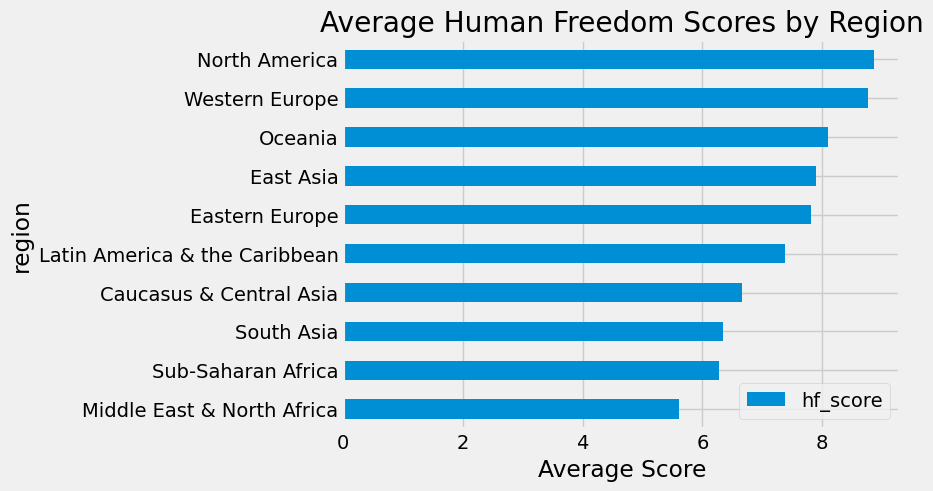

In [69]:
hfscore_x_countries = pd.DataFrame(human_freedom_index.groupby("region")["hf_score"].mean().sort_values(ascending = True))
hfscore_x_countries.plot(kind='barh', title="Average Human Freedom Scores by Region")
plt.xlabel("Average Score")
plt.show()

# 4. Histogram

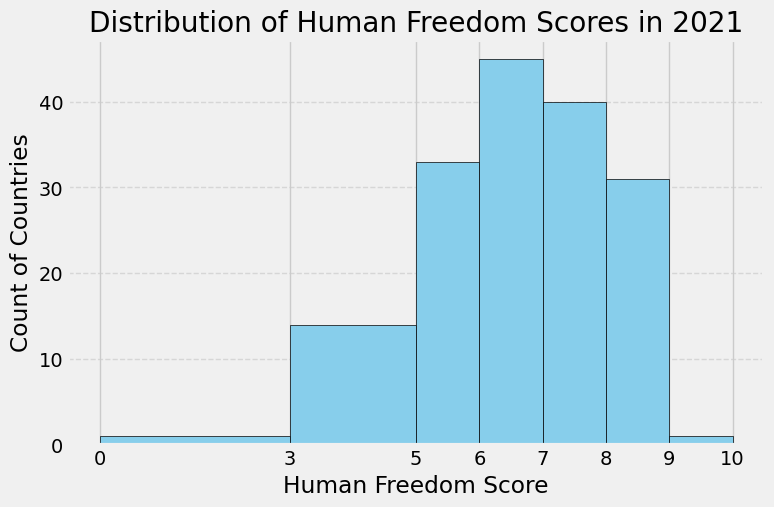

In [71]:
hf_score_2021 = human_freedom_index[human_freedom_index['year'] == 2021]
my_bins = [0, 3, 5, 6, 7, 8, 9, 10]

hf_score_2021['hf_score'].plot.hist(bins=my_bins, edgecolor='black', color='skyblue', figsize=(8, 5))

plt.title("Distribution of Human Freedom Scores in 2021")
plt.xlabel("Human Freedom Score")
plt.ylabel("Count of Countries")
plt.xticks(my_bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Line Graph

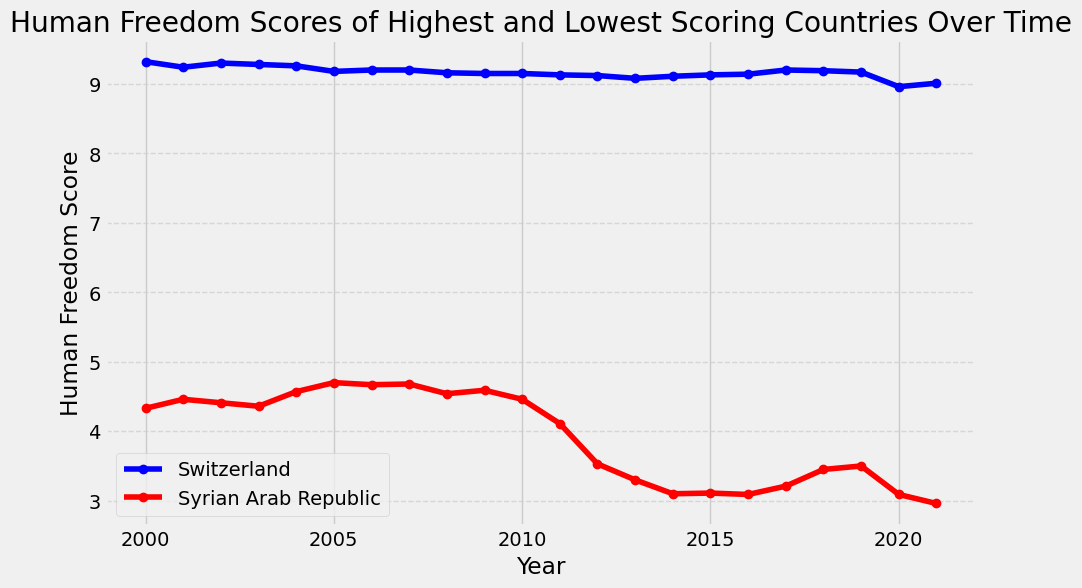

In [73]:
hf_2021 = human_freedom_index[human_freedom_index['year'] == 2021]

highest_country = hf_2021[hf_2021['hf_score'] == hf_2021['hf_score'].max()]['countries'].values[0]
lowest_country = hf_2021[hf_2021['hf_score'] == hf_2021['hf_score'].min()]['countries'].values[0]

highest_country_data = human_freedom_index[human_freedom_index['countries'] == highest_country]
lowest_country_data = human_freedom_index[human_freedom_index['countries'] == lowest_country]

ax = highest_country_data.plot(x='year', y='hf_score', label=highest_country, marker='o', color='blue', figsize=(10, 6))
lowest_country_data.plot(x='year', y='hf_score', label=lowest_country, marker='o', color='red', ax=ax)

ax.set_title("Human Freedom Scores of Highest and Lowest Scoring Countries Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Human Freedom Score")
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# 6. 

In [75]:
avg_hf_scores=human_freedom_index[human_freedom_index['year'] >= 2011].groupby('countries')['hf_score'].mean().reset_index()
avg_hf_scores.rename(columns={"hf_score": "average_hf_score"}, inplace=True)
top_countries=avg_hf_scores[avg_hf_scores['average_hf_score']>8.8].sort_values(by='average_hf_score',ascending=False)

In [76]:
avg_hf_scores.head(5)

,countries,average_hf_score
0,Albania,7.910909
1,Algeria,5.017273
2,Angola,5.574545
3,Argentina,7.236364
4,Armenia,7.764545


In [77]:
top_countries.head(5)

,countries,average_hf_score
109,New Zealand,9.138182
143,Switzerland,9.112727
42,Denmark,9.000000
73,Ireland,8.920909
52,Finland,8.915455


# 7. Pivot Table

In [79]:
filtered_data = human_freedom_index[
    (human_freedom_index['countries'].isin(top_countries['countries'])) & 
    (human_freedom_index['year'] >= 2011)
]

filtered_data.pivot_table(
    index='countries',  # Rows: countries
    columns='year',     # Columns: years
    values='hf_score',  # Values: human freedom scores
    aggfunc=np.average  # Aggregate with average if there are multiple entries for the same year
)


year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
countries,,,,,,,,,,,
Australia,8.98,8.98,8.97,8.99,8.97,8.99,8.98,8.99,8.84,8.53,8.52
Canada,8.79,8.80,8.85,8.97,8.92,8.92,8.90,8.87,8.87,8.50,8.55
Denmark,9.01,9.00,9.02,9.07,9.06,9.07,9.04,9.04,9.05,8.81,8.83
Estonia,8.83,8.81,8.84,8.91,8.95,8.97,8.96,8.98,8.97,8.77,8.75
Finland,9.04,9.01,8.96,8.99,8.94,8.93,8.92,8.96,8.92,8.70,8.70
Ireland,8.91,8.93,8.94,8.98,9.03,8.97,8.95,8.93,8.97,8.73,8.79
Luxembourg,8.86,8.86,8.91,8.98,8.93,8.92,8.96,8.96,8.95,8.66,8.71
New Zealand,9.17,9.19,9.20,9.22,9.22,9.23,9.20,9.20,9.08,8.93,8.88
Norway,8.76,8.91,8.91,8.90,8.73,8.91,8.92,8.89,8.85,8.59,8.58


# 8. 

In [81]:
human_freedom_index_updated = human_freedom_index.copy()
human_freedom_index_updated['hf_class'] = human_freedom_index_updated['hf_score'].apply(
    lambda x: 'A' if x >= 8 else ('B' if x >= 7 else ('C' if x >= 6 else 'D'))
)

In [82]:
human_freedom_index_updated.head(5)

,countries,region,year,hf_score,hf_class
0,Albania,Eastern Europe,2021,7.67,B
1,Algeria,Middle East & North Africa,2021,4.82,D
2,Angola,Sub-Saharan Africa,2021,5.76,D
3,Argentina,Latin America & the Caribbean,2021,6.85,C
4,Armenia,Caucasus & Central Asia,2021,7.99,B


Text(0, 0.5, 'Percentage of Countries')

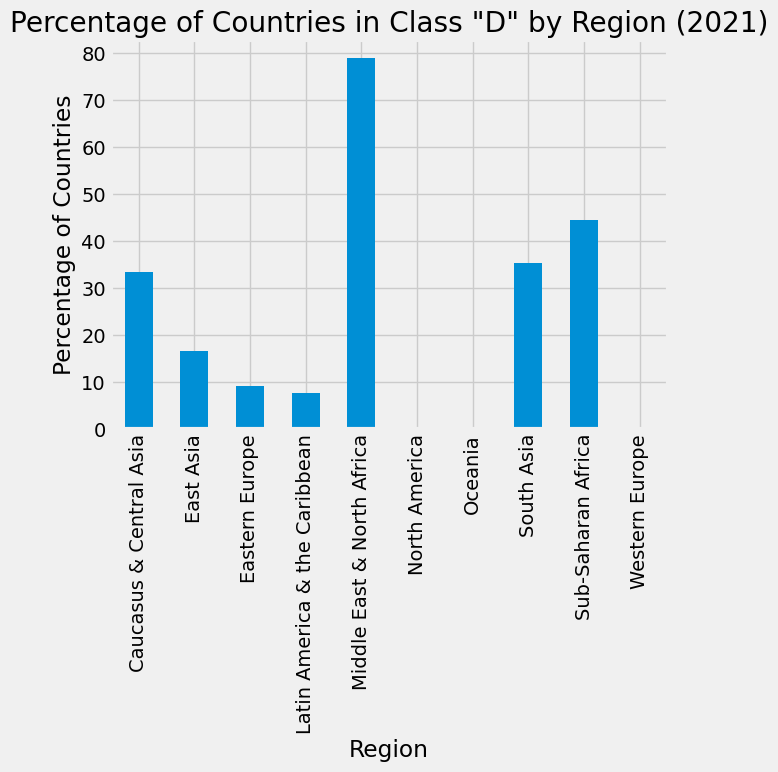

In [83]:
data_2021 = human_freedom_index_updated[human_freedom_index_updated['year'] == 2021]

class_d_percentage = data_2021[data_2021['hf_class'] == 'D'].groupby('region').size() / data_2021.groupby('region').size() * 100

class_d_percentage.plot(kind='bar')

plt.title('Percentage of Countries in Class "D" by Region (2021)')
plt.xlabel('Region')
plt.ylabel('Percentage of Countries')


# 9. 

In [85]:
diff_max_min = human_freedom_index.groupby('countries').agg(diff=('hf_score', lambda x: x.max() - x.min())).sort_values('diff', ascending=False)

In [86]:
diff_max_min.head(5)

,diff
countries,
"Venezuela, RB",2.81
Nicaragua,1.97
Myanmar,1.89
"Yemen, Rep.",1.88
Syrian Arab Republic,1.74


# 10. Scatter Plot

<Axes: xlabel='hf_score', ylabel='Gross domestic product GDP percapta'>

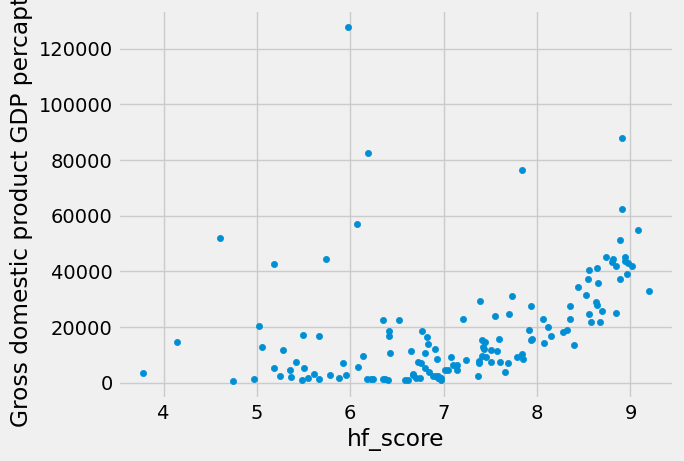

In [88]:
merged_data = pd.merge(human_freedom_index[human_freedom_index['year'] == 2013], 
                       world_indexes[['countries', 'Gross domestic product GDP percapta']], 
                       on='countries', 
                       how='inner')

merged_data.plot.scatter(x='hf_score', y='Gross domestic product GDP percapta')

# 11.  Scatter Plot

<Axes: xlabel='hf_score', ylabel='Primary school dropout rate 2008-2014'>

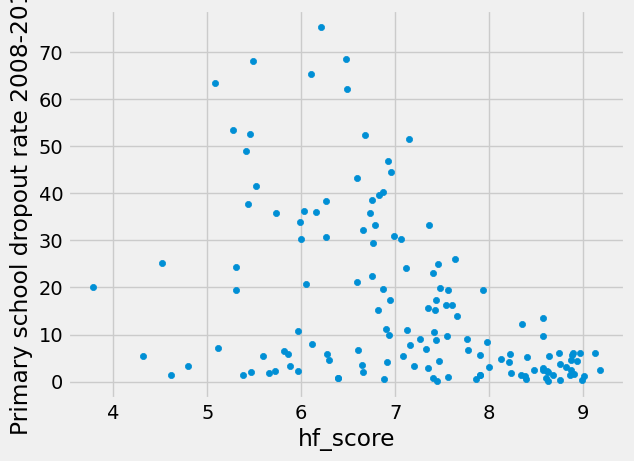

In [90]:
avg_hf_scores = human_freedom_index[(human_freedom_index['year'] >= 2008) & (human_freedom_index['year'] <= 2014)].groupby('countries')['hf_score'].mean().reset_index()
merged_data = pd.merge(avg_hf_scores, world_indexes[['countries', 'Primary school dropout rate 2008-2014']], on='countries', how='inner')
merged_data.plot.scatter(x='hf_score', y='Primary school dropout rate 2008-2014')

# 12.  Bar Chart

<Axes: xlabel='hf_class'>

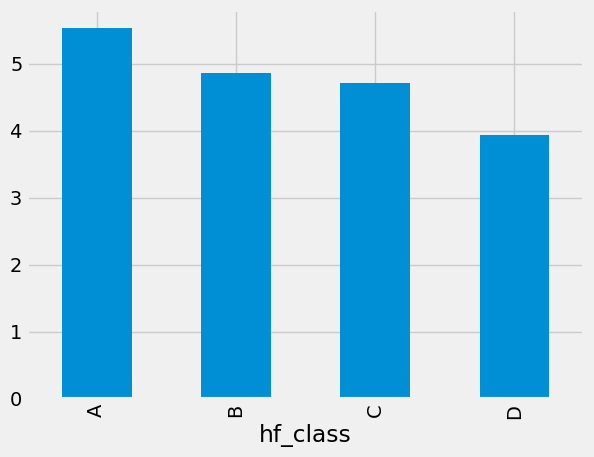

In [92]:
data_2013 = human_freedom_index_updated[human_freedom_index_updated['year'] == 2013]
merged_data = pd.merge(data_2013[['countries', 'hf_class']], world_indexes[['countries', 'Public expenditure on education Percentange GDP']], on='countries', how='inner')
avg_education_expenditure = merged_data.groupby('hf_class')['Public expenditure on education Percentange GDP'].mean()
avg_education_expenditure.plot(kind='bar')